In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp
import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline


In [2]:
baseline_file = get_baseline()

In [3]:
metric = maf.MeanMetric(col='fiveSigmaDepth')
slicer = maf.HealpixSlicer(nside=4)
sql = 'filter="r"'

Healpix slicer using NSIDE=4, approximate resolution 879.484521 arcminutes


In [4]:
bundle = maf.MetricBundle(metric, slicer, sql)

In [5]:
bd = maf.makeBundlesDictFromList([bundle])
g = maf.MetricBundleGroup(bd, baseline_file, 'temp')

In [6]:
g.runAll()

Querying table None with constraint filter="r" for columns ['fiveSigmaDepth', 'fieldDec', 'rotSkyPos', 'fieldRA']
Found 464851 visits
Running:  ['opsim_Mean_fiveSigmaDepth_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


0.0 180.0 -180.0 180.0


Plotting figures with "filter="r"" constraint now.
Plotting complete.


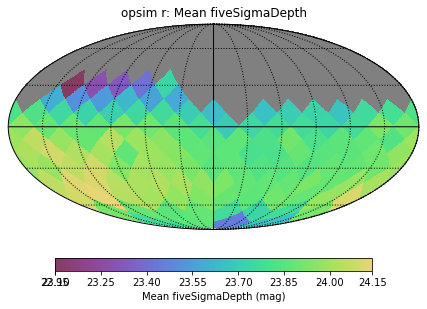

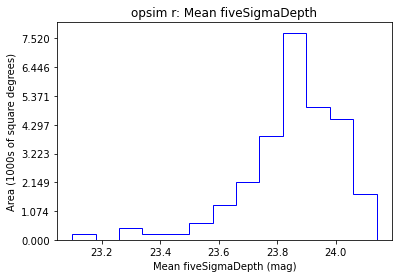

In [7]:
g.plotAll(closefigs=False)

In [8]:
# Make a pretty table
_temp = np.hstack([slicer.slicePoints['ra'],slicer.slicePoints['dec'], bundle.metricValues.data])

In [9]:
df = pd.DataFrame()
_temp = bundle.metricValues.data + 0
_temp[np.where(bundle.metricValues.mask)] = np.nan
df['RA'] = np.degrees(slicer.slicePoints['ra'])
df['dec'] = np.degrees(slicer.slicePoints['dec'])
df['Metric'] = _temp


In [10]:
df

,RA,dec,Metric
0,45.0,78.284148,NaN
1,135.0,78.284148,NaN
2,225.0,78.284148,NaN
3,315.0,78.284148,NaN
4,22.5,66.443536,NaN
...,...,...,...
187,337.5,-66.443536,23.767004
188,45.0,-78.284148,23.859904
189,135.0,-78.284148,23.770817
190,225.0,-78.284148,23.657256
